# Burning with Curiosity Rapid EDA & MLR

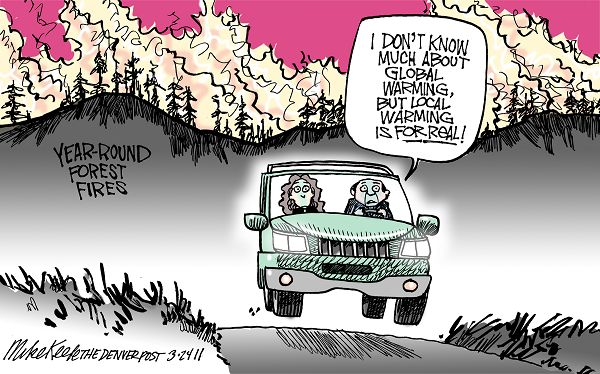

Source: Mike Keefe

## Data Preparationg and Exploration

### Load & Inspect Data

In [1]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [2]:
#Load Dataset
forestfires_df = pd.read_csv('forestfires.csv')

In [3]:
#Data Overview
forestfires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Glossary:

- FFMC: Fine Fuel Moisture Code numeric rating of the moisture content of forest litter and other cured fine fuels
- DMC: Duff Moisture Code numerical rating of the average moisture content of loosely compacted organic layers of moderate depth. The code indicates the depth that fire will burn in moderate duff layers and medium size woody material.
- DC: Drought Code numeric rating of the average moisture content of deep, compact organic layers in the soil
- ISI: Initial Spread Indexis a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC
- Temp is in celsius 
- RH: Relative Humidity 

### Potential Questions to Consider for Analysis
1. What are the key meteorological and spatial factors that influence the burned area ("area") of forest fires?

2. How do seasonal patterns (month and day) affect forest fire occurrences and the size of the burned area?

3. What are the relationships among temperature, humidity, wind speed, and indices like FFMC, DMC, DC, and ISI in the context of forest fires?

In [4]:
forestfires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [10]:
# Convert temperature from Celsius to Fahrenheit for better interpretability
forestfires_df['temp_F'] = forestfires_df['temp'] * 9/5 + 32
forestfires_df['temp_F']

0      46.76
1      64.40
2      58.28
3      46.94
4      52.52
       ...  
512    82.04
513    71.42
514    70.16
515    78.08
516    53.24
Name: temp_F, Length: 517, dtype: float64

In [9]:
forestfires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,temp_F
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,66.000503
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,10.451926
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,35.960000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,59.900000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,66.740000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,73.040000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,91.940000


Key Insights: 

**Spatial Coordinates (X and Y)**:
- The spatial coordinates range between 1 and 9 for X and between 2 and 9 for Y. This provides a limited spatial distribution, indicating a specific area in Montesinho park where fires occurred.
FWI System Indices 

**(FFMC, DMC, DC, ISI):**
- FFMC (Fine Fuel Moisture Code) has a high mean (90.6) with a narrow range (18.7 - 96.2), indicating generally dry conditions, which could contribute to higher fire risk.
- DMC (Duff Moisture Code) has a wider range (1.1 - 291.3), showing significant variation in moisture conditions in the medium layers of forest fuels.
- DC (Drought Code) also has a large range (7.9 - 860.6), suggesting varying drought conditions, which likely impact fire intensity and spread.
- ISI (Initial Spread Index) ranges from 0.0 to 56.1, highlighting that the fire's initial spread rates vary significantly.

**Meteorological Conditions (temp, RH, wind, rain):**
- Temperature: Ranges from 2.2°C to 33.3°C, with a mean of 18.9°C. (35-91 degrees F) Higher temperatures could indicate greater fire risk, especially in conjunction with low humidity.
- Relative Humidity (RH): Ranges widely from 15% to 100%, with a mean of 44.3%. Low RH values can exacerbate fire conditions.
- Wind Speed: Wind speed varies from 0.4 to 9.4 km/h, with a mean of 4.02 km/h. Higher wind speeds often help fires spread.
- Rain: The majority of instances (50th and 75th percentiles) have zero rainfall, with a max of 6.4 mm. This suggests that fires are mostly occurring under dry conditions.

**Burned Area (area):**
- The burned area is highly skewed, with most values near zero (median = 0.52, mean = 12.8), but it can reach up to 1090.84 ha in rare cases. The skewness suggests a need for transformation (log transformation was applied in the code) to normalize the data.

## Exploratory Data Analysis (EDA)

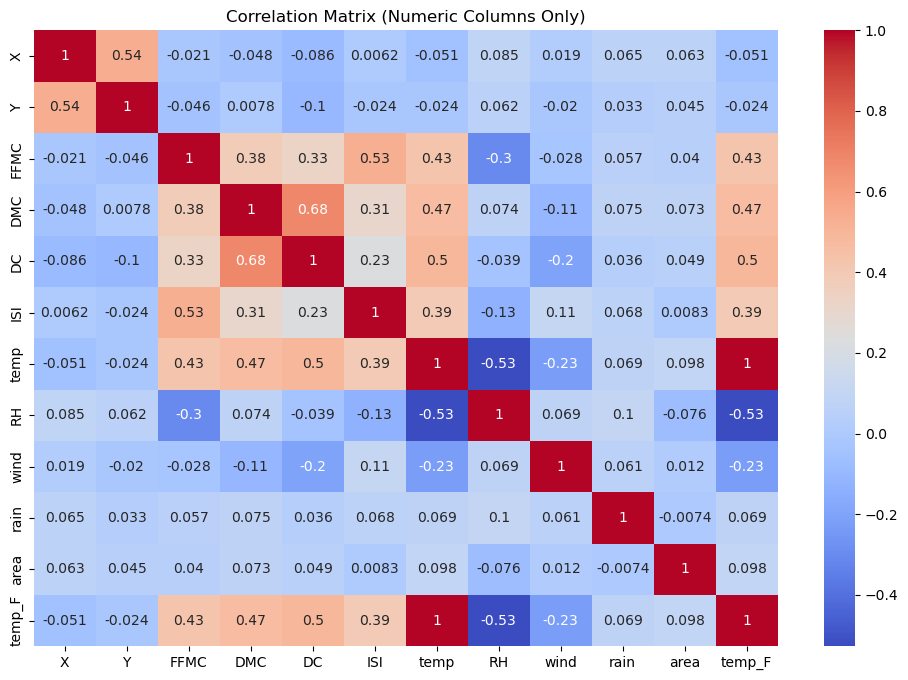

In [14]:
# Select only numeric columns for the correlation matrix
numeric_df = forestfires_df.select_dtypes(include=[np.number])

# Plot the correlation matrix for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

Interpretation: 
**X and Y (0.54 correlation):**
- The X and Y columns represent spatial coordinates within the Montesinho park. A 0.54 correlation suggests a moderate positive relationship between these coordinates, meaning that as one coordinate increases, the other tends to increase as well. This could imply some spatial clustering of forest fires within the park, but it doesn’t necessarily impact the burned area directly.

**FFMC and ISI (0.53 correlation):**
- The FFMC (Fine Fuel Moisture Code) and ISI (Initial Spread Index) show a moderate positive correlation of 0.53. This makes sense because both indices are part of the Fire Weather Index (FWI) system and are related to fire spread. FFMC measures the dryness of small fuels like leaves, while ISI estimates how quickly a fire could spread. When FFMC increases (indicating drier conditions), ISI tends to increase as well, suggesting that drier fuel leads to faster potential fire spread.

**DMC and DC (0.68 correlation):**
- DMC (Duff Moisture Code) and DC (Drought Code) have a strong positive correlation of 0.68. Both indices measure fuel moisture, with DMC focused on the drying of medium-size materials and DC on deep, slow-drying fuel layers. Their correlation indicates that when medium-sized fuel dries out (high DMC), deeper layers are also likely to be drier (high DC), which can increase the likelihood and intensity of forest fires.

**DC and Temperature (0.5 correlation):**
- DC and Temperature have a moderate correlation of 0.5, indicating that higher temperatures are associated with drier deep fuel layers. Since higher temperatures contribute to drying, they could reduce moisture in fuels, increasing the potential for fires. This correlation provides insight into how warmer periods might amplify fire risks due to drier conditions in the forest ecosystem.

## Key Meterological and Spatial Factors
What are the key meteorological and spatial factors that influence the burned area of forest fires?

In [19]:
forestfires_df['area'].value_counts()

area
0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: count, Length: 251, dtype: int64

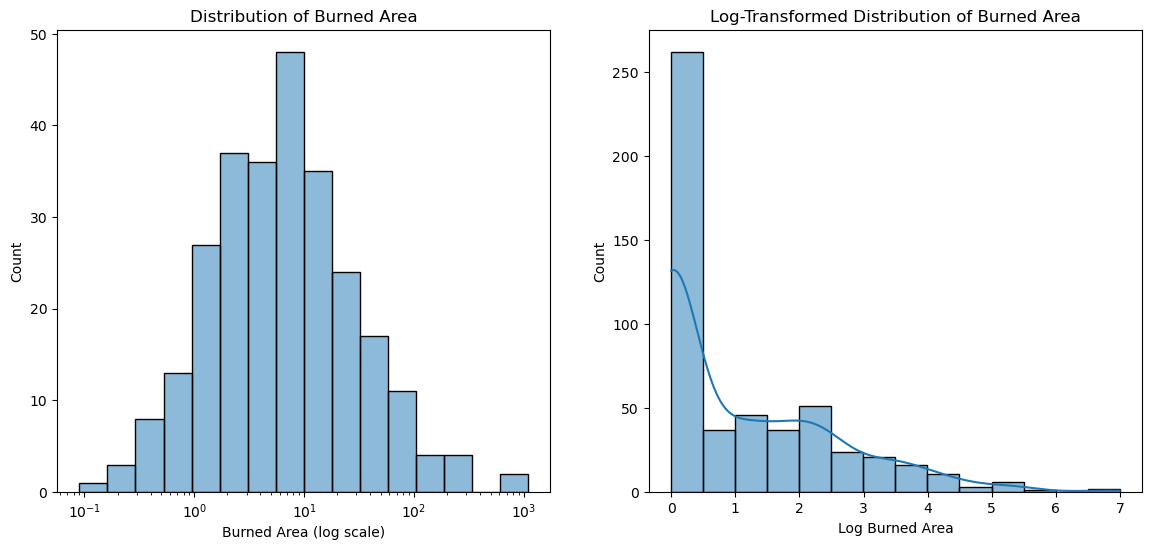

In [16]:
## Distribution of Burned Area (Transformed and Raw)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Burned area distribution
sns.histplot(forestfires_df['area'], kde=True, log_scale=True, ax=axs[0])
axs[0].set_title('Distribution of Burned Area')
axs[0].set_xlabel('Burned Area (log scale)')

# Log-transformed area
forestfires_df['log_area'] = np.log(forestfires_df['area'] + 1)
sns.histplot(forestfires_df['log_area'], kde=True, ax=axs[1])
axs[1].set_title('Log-Transformed Distribution of Burned Area')
axs[1].set_xlabel('Log Burned Area')

plt.show()

Distribution of Burned Area Insights:

**High Frequency of Small Fires:** 
The vast majority of the observations (247 instances) have an area value of 0.00, which likely represents either no significant burned area or very small fires that didn’t cause measurable damage. This could indicate that most fire occurrences in the dataset didn’t lead to large-scale burning, perhaps due to effective control measures or environmental factors that limited fire spread. (Kaggle did mention that data is skewed towards 0.0)

**Few Large Fires**: 
There are very few instances with large burned areas (e.g., 105.66, 154.88, 196.48, 200.94). This aligns with typical forest fire data, where large-scale fires are rare events but often have substantial impacts when they do occur. These few large values suggest that only a small number of fires reach high burn areas, creating a highly skewed distribution.

**Skewed Distribution:** 
The data is heavily skewed toward smaller values, with a long tail extending to larger areas. This is a common challenge in environmental data, where small events are frequent, and large events, while rare, can have outsized effects. 

**Outlier Potential:** The large burned areas, even if few, could be considered outliers given their infrequency. However, in the context of forest fires, these outliers are expected rather than unusual. Including them in the analysis with appropriate transformations or using techniques that handle skewed data will be essential for accurate modeling.

In [22]:
forestfires_df['log_area'].value_counts()

log_area
0.000000    247
1.078410      3
0.418710      2
1.549688      2
0.518794      2
           ... 
4.669646      1
5.049086      1
5.285637      1
5.307971      1
2.498152      1
Name: count, Length: 251, dtype: int64

Distribution of Burned Area Insights (Log-Transformed):

The log-transformed distribution of the burned area (`log_area`) shows that most values are clustered around 0, corresponding to small fires or no significant burn. The transformation compresses the range of large values, making the data less skewed and better suited for analysis. Although large fires still appear as outliers (with values above 4), they are now more appropriately scaled, allowing for more effective modeling of fire occurrence and severity.


## Seasonal Patterns Analysis
 Month and Day Impact on Burned Area

In [35]:
# Grouping by month and calculating total burned area and fire counts
month_summary = forestfires_df.groupby('month').agg(
    total_burned_area=('log_area', 'sum'),
    fire_count=('log_area', 'count')
).reset_index()

# Sorting by total burned area and fire count
month_summary_sorted_by_burned = month_summary.sort_values(by='total_burned_area', ascending=False)
month_summary_sorted_by_fire_count = month_summary.sort_values(by='fire_count', ascending=False)

# Display the month with the highest total burned area and highest number of fires
print("Month with the most burned area:")
print(month_summary_sorted_by_burned.head(5))
print("\nMonth with the most fires:")
print(month_summary_sorted_by_fire_count.head(5))

Month with the most burned area:
   month  total_burned_area  fire_count
11   sep         219.220430         172
1    aug         192.316084         184
7    mar          41.718485          54
5    jul          34.676499          32
2    dec          23.145030           9

Month with the most fires:
   month  total_burned_area  fire_count
1    aug         192.316084         184
11   sep         219.220430         172
7    mar          41.718485          54
5    jul          34.676499          32
3    feb          21.756676          20


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_29149/3286341105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total_burned_area', data=month_burned_area, palette='viridis')


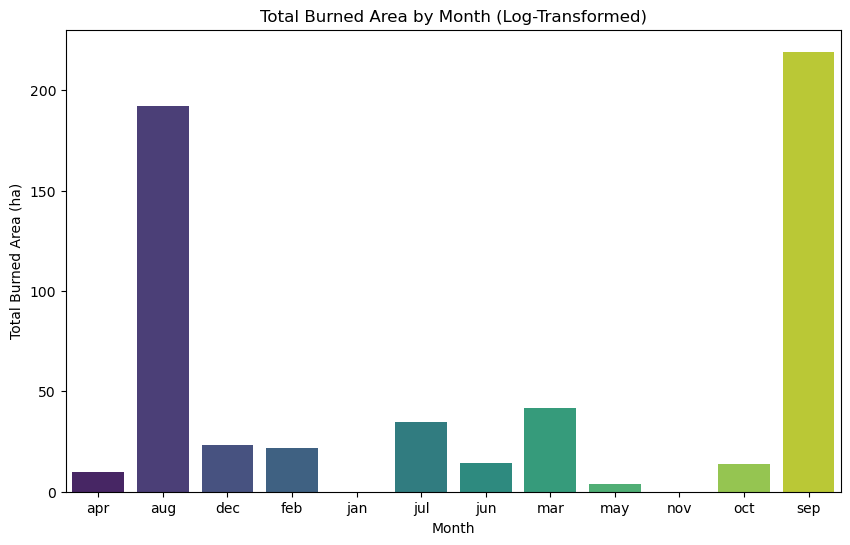

In [37]:
# Bar plot for total burned area by month
plt.figure(figsize=(10, 6))
month_burned_area = forestfires_df.groupby('month').agg(total_burned_area=('log_area', 'sum')).reset_index()
sns.barplot(x='month', y='total_burned_area', data=month_burned_area, palette='viridis')
plt.title('Total Burned Area by Month (Log-Transformed)')
plt.ylabel('Total Burned Area (ha)')
plt.xlabel('Month')
plt.show()


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_29149/1005105857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='fire_count', data=month_fire_count, palette='viridis')


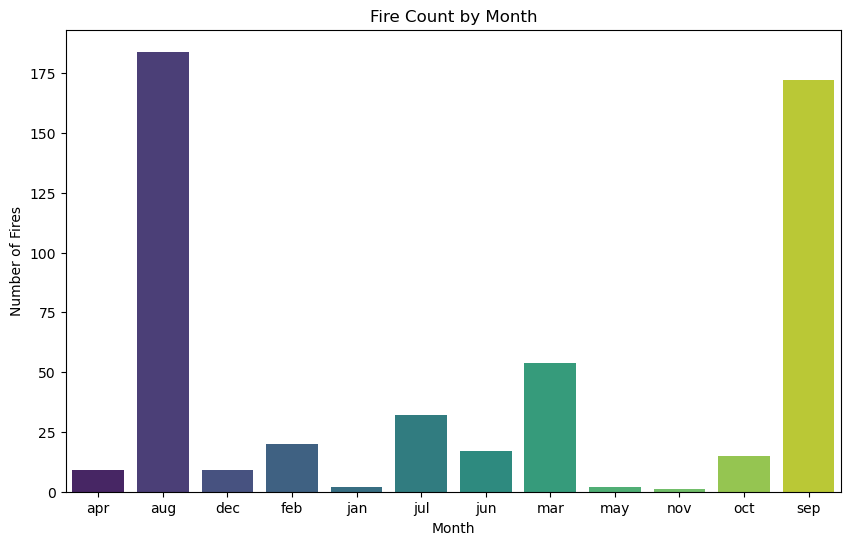

In [39]:
# Bar plot for fire count by month
plt.figure(figsize=(10, 6))
month_fire_count = forestfires_df.groupby('month').agg(fire_count=('log_area', 'count')).reset_index()
sns.barplot(x='month', y='fire_count', data=month_fire_count, palette='viridis')
plt.title('Fire Count by Month')
plt.ylabel('Number of Fires')
plt.xlabel('Month')
plt.show()

Month Interpretation: 

The month of September shows the highest total burned area (219.22 ha) with 172 fires, followed closely by August with 192.32 ha and 184 fires. These two months appear to be the most active in terms of both the frequency of fires and the severity of burning. On the other hand, December records the lowest total burned area (23.15 ha) with only 9 fires, indicating that forest fires are much less frequent and less severe during the colder months, which aligns with seasonal weather patterns.

In [34]:
# Grouping by day and calculating total burned area and fire counts
day_summary = forestfires_df.groupby('day').agg(
    total_burned_area=('log_area', 'sum'),
    fire_count=('log_area', 'count')
).reset_index()

# Sorting by total burned area and fire count
day_summary_sorted_by_burned = day_summary.sort_values(by='total_burned_area', ascending=False)
day_summary_sorted_by_fire_count = day_summary.sort_values(by='fire_count', ascending=False)

# Display the day with the highest total burned area and highest number of fires
print("\nDay with the most burned area:")
print(day_summary_sorted_by_burned.head(5))
print("\nDay with the most fires:")
print(day_summary_sorted_by_fire_count.head(5))


Day with the most burned area:
   day  total_burned_area  fire_count
3  sun         106.788819          95
2  sat         103.017271          84
0  fri          82.430516          85
1  mon          80.657601          74
5  tue          78.765994          64

Day with the most fires:
   day  total_burned_area  fire_count
3  sun         106.788819          95
0  fri          82.430516          85
2  sat         103.017271          84
1  mon          80.657601          74
5  tue          78.765994          64


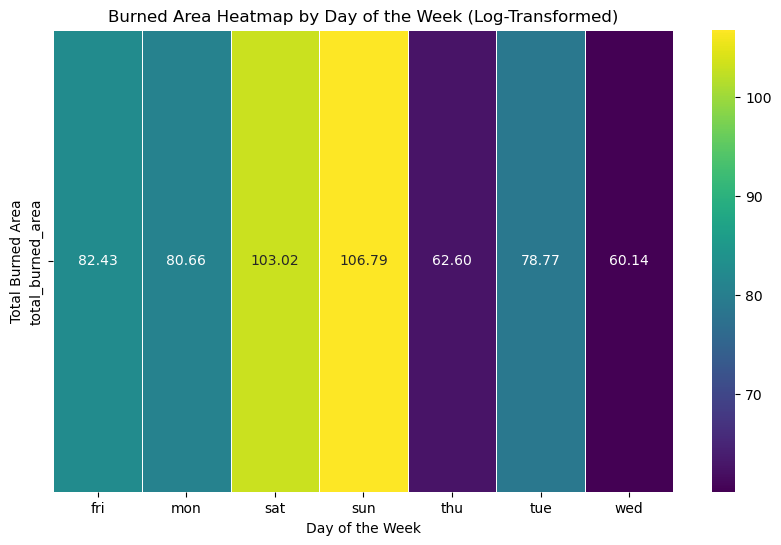

In [42]:
# Grouping the data by day and summing the burned area (log-transformed)
day_burned_area = forestfires_df.groupby('day').agg(total_burned_area=('log_area', 'sum')).reset_index()

#pivot table for better visualization (day vs. total burned area)
day_burned_area_pivot = day_burned_area.pivot_table(index='day', values='total_burned_area', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(day_burned_area_pivot.T, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Burned Area Heatmap by Day of the Week (Log-Transformed)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Burned Area')
plt.show()

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_29149/157353683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_burned_area', data=day_burned_area, palette='viridis')


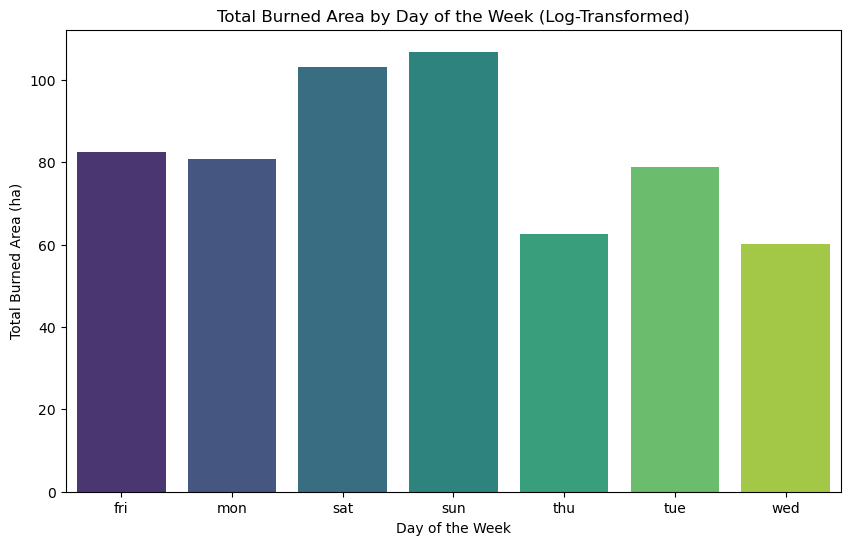

In [41]:
# Bar plot for total burned area by day
plt.figure(figsize=(10, 6))
day_burned_area = forestfires_df.groupby('day').agg(total_burned_area=('log_area', 'sum')).reset_index()
sns.barplot(x='day', y='total_burned_area', data=day_burned_area, palette='viridis')
plt.title('Total Burned Area by Day of the Week (Log-Transformed)')
plt.ylabel('Total Burned Area (ha)')
plt.xlabel('Day of the Week')
plt.show()

Day Interpretation:

Sunday stands out as the day with the most significant burned area (106.79 ha) and the most fires (95), followed by Saturday and Friday, which also show high values for both total burned area and fire count. This pattern suggests that weekends may experience more fires and larger burn areas, possibly due to increased human activity or environmental conditions conducive to fire spread. Conversely, Tuesday shows fewer fires and less burned area, indicating a lower level of fire activity during the midweek period.

## Relationships Analysis:
among temperature, humidity, wind speed, and indices like FFMC, DMC, DC, and ISI in the context of forest fires

/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/envs/cohor

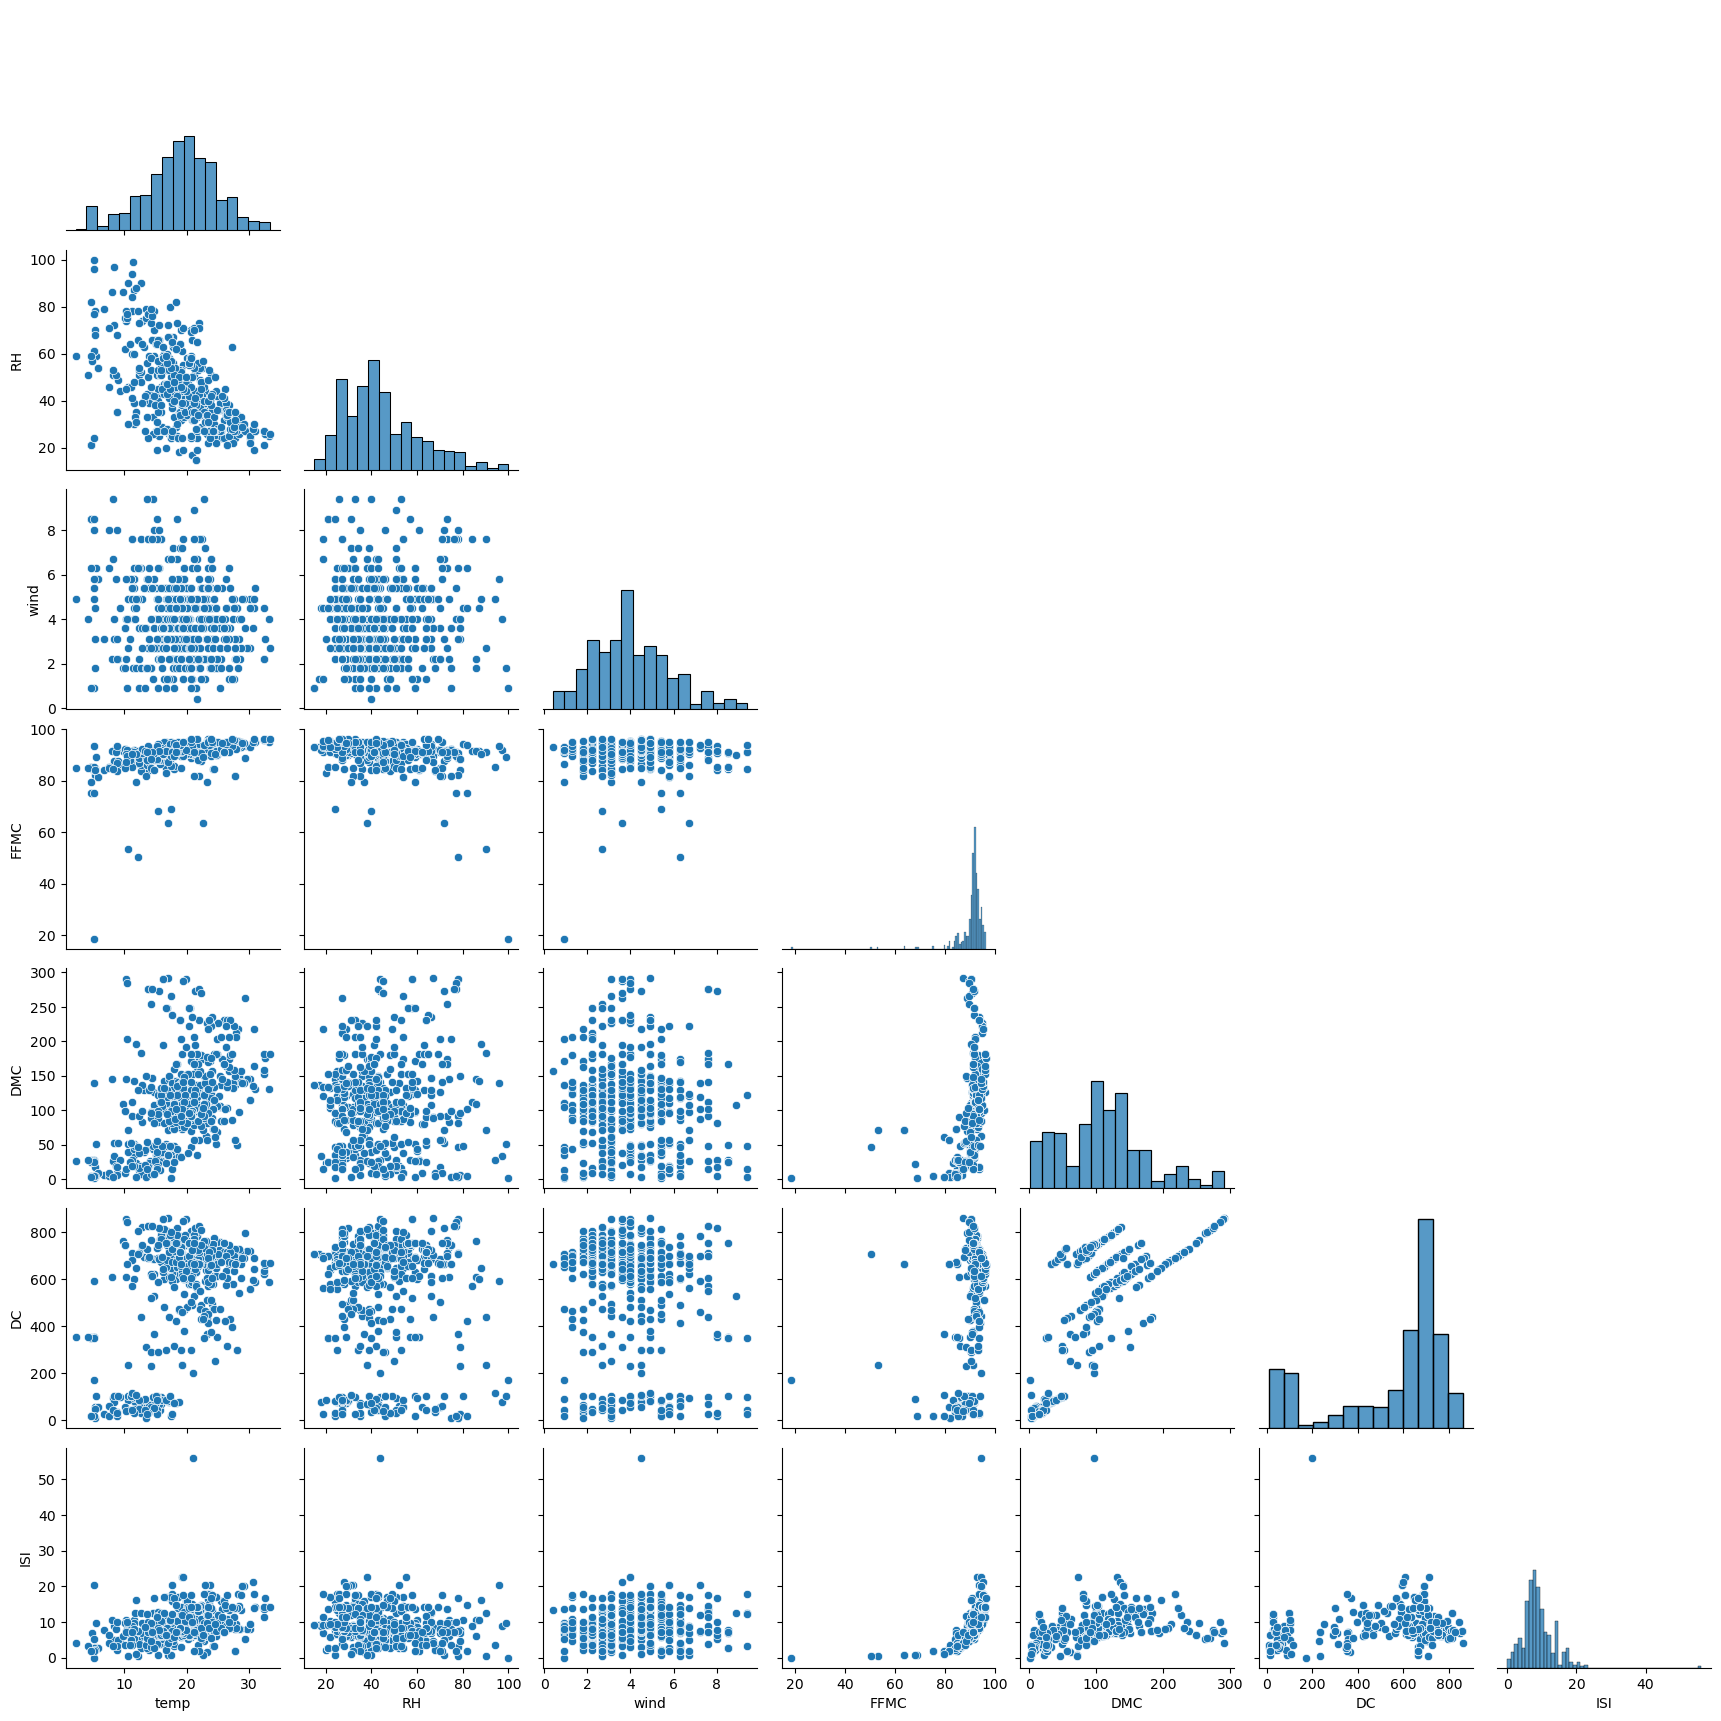

In [46]:
# Pairplot for selected variables to understand relationships among them (with log-transformed area)
sns.pairplot(forestfires_df, vars=['temp', 'RH', 'wind', 'FFMC', 'DMC', 'DC', 'ISI'], 
             corner=True, palette='viridis')

Interpretation of the Pairplot insights:

1. **Non-linear relationship between temperature and FFMC (Fine Fuel Moisture Code)**: The plot shows that as temperature increases, FFMC does not follow a simple linear pattern. Instead, the relationship might be more complex, indicating that temperature alone might not fully explain changes in FFMC. There may be other contributing factors at play.

2. **Strong positive correlation between temperature and DMC (Duff Moisture Code)**: There is a strong positive relationship between temperature and DMC, suggesting that as the temperature rises, the moisture content in the duff layer (decaying organic material on the forest floor) increases. This could mean that hotter conditions tend to lead to higher moisture levels in the duff, potentially influencing fire behavior.

3. **Positive correlation between DMC and DC (Drought Code)**: DMC and DC are positively correlated, which makes sense because both indices measure different aspects of fuel moisture and dryness in the forest. Higher DMC values, which reflect moisture content in the forest floor, are likely linked to higher DC values, which indicate drought conditions affecting the forest.

4. **Strong negative correlation between temperature and relative humidity (RH)**: The negative correlation between temperature and RH shows that as temperature rises, relative humidity tends to decrease. This relationship is intuitive, as warmer air can hold more moisture, which often leads to lower humidity levels, creating conditions conducive to forest fires.

5. **No correlation between wind and temperature or wind and relative humidity**: Wind speed does not seem to have a direct relationship with temperature or humidity in this dataset. This could suggest that wind is not influenced by the immediate weather conditions like temperature and humidity in this context, or that other factors are more significant in affecting wind speed.

### In Summary:
These pairplot insights reveal that temperature plays a key role in determining fire behavior through its relationships with various fire indices, but factors like humidity and wind don’t exhibit strong connections to other variables, suggesting that fire behavior may be influenced by a more complex set of factors. The negative correlation between temperature and RH, along with the strong positive relationships between moisture indices, provides a better understanding of how fire-prone conditions emerge in forest environments.


## Multiple Linear Regression (MLR)

In [47]:
# Define predictors and target variable
X = forestfires_df[['temp', 'RH', 'wind', 'FFMC', 'DMC', 'DC', 'ISI']]
y = forestfires_df['log_area']

In [53]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     temp  RH  wind  FFMC    DMC     DC   ISI
 329  23.5  27   4.0  92.2  102.3  751.5   8.4
 173  17.7  39   2.2  90.9  126.5  686.5   7.0
 272  20.2  47   4.0  92.1  152.6  658.2  14.3
 497  32.3  27   2.2  96.1  181.1  671.2  14.3
 182  12.4  53   2.2  86.8   15.6   48.3   3.9
 ..    ...  ..   ...   ...    ...    ...   ...
 71   17.7  37   3.6  94.3   85.1  692.3  15.9
 106  18.2  29   3.1  91.4   30.7   74.3   7.5
 270  21.8  56   3.1  92.1  152.6  658.2  14.3
 435  23.8  51   1.8  90.8   84.7  376.6   5.6
 102  20.1  40   4.0  94.8  108.3  647.1  17.0
 
 [413 rows x 7 columns],
      temp  RH  wind  FFMC    DMC     DC   ISI
 304  11.3  94   4.9  85.1   28.0  113.8   3.5
 501  21.6  65   4.9  96.1  181.1  671.2  14.3
 441  25.5  29   1.8  92.1  207.0  672.6   8.2
 153  20.1  47   4.9  94.3   85.1  692.3  15.9
 503  29.2  30   4.9  94.5  139.4  689.1  20.0
 ..    ...  ..   ...   ...    ...    ...   ...
 167  23.4  33   4.5  96.0  127.1  570.5  16.5
 275   5.1  61   4.9  84.6   26.4

In [49]:
# Model Fitting
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


LinearRegression()

In [50]:
# Predictions on test data and Model Evaluation
y_pred = mlr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2.186369945040084
Mean Absolute Error: 1.1905454052593982


**MLR Interpretation:** 

Mean Squared Error and Mean Absolute Error are 2.19 and 1.19, respectively. These values indicate that the model's predictions are relatively close to the actual values, but the performance can still be improved given the low R-squared value (0.019), which suggests that the model only explains about 1.9% of the variance in burned area.


In [52]:
# Statistical Summary 
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.445
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.185
Time:                        11:40:29   Log-Likelihood:                -901.38
No. Observations:                 517   AIC:                             1819.
Df Residuals:                     509   BIC:                             1853.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1547      1.351      0.114      0.9

OLS Results show that wind has a statistically significant positive relationship with the log-transformed burned area (p-value = 0.035), while temperature, humidity (RH), and most of the other indices like FFMC, DMC, DC, and ISI are not statistically significant based on their p-values (all > 0.05). This means that wind speed could be a meaningful factor influencing the burned area, but other factors in the model don't show strong predictive power.

### Non-Technical Summary and Reflection on previously asked Questions:

**Key Meteorological and Spatial Factors:** 
The model suggests wind speed as the most significant meteorological factor influencing the burned area, with other factors like temperature, humidity, and fire indices not showing strong predictive relationships in this analysis. The R-squared value is quite low, indicating that other factors not included in the model might also play a role.

**Impact of Seasonal Patterns (Month and Day):**
Our analysis shows that the month of September consistently has the most burned area and the most fires, followed by August, indicating that these months experience more severe fire seasons. On days of the week, Sunday and Saturday tend to see the highest number of fires and burned area, likely due to higher activity and potentially more favorable conditions for fires on weekends.

**Relationships Among Variables:**
Temperature, humidity, and wind speed show some interesting relationships. For example, temperature has a non-linear relationship with FFMC (Fine Fuel Moisture Code) and a strong positive correlation with DMC (Duff Moisture Code). There is a significant negative correlation between temperature and humidity (RH), meaning that higher temperatures tend to coincide with lower humidity, which is favorable for fire spread. However, other variables like FFMC, DMC, and ISI don't show strong correlations with burned area in the MLR analysis.
